In [20]:
library(tidyverse)
library(tidymodels)
library(repr)
library(dplyr)


## Introduction ##

A research group at UBC has chosen to create a project to gather data on video game patterns by utilizing a Minecraft server. This server records various metrics, which includes playtime, age, gender and experience level of each player. The data collected gives insight into the player’s demographics and behavior, in which we chose to analyze the relationship between playtime and age from the dataset provided.

Specifically, we aimed to determine which age groups are most likely to contribute to the dataset. By this, we would get a better understanding of how the distribution of participants varies across different age ranges. 

The dataset used for this analysis includes all the information on each player gathered by the Minecraft server. This allows us to explore patterns and common trends that could inform future research.


## Methods & Results: ##

In [21]:
playersurl <-"https://raw.githubusercontent.com/Alexis-Jang/Group7-DSCI100project/refs/heads/main/DSCI%20100%20Players.csv"
players.csv <- "players.csv"
download.file(playersurl,players.csv, mode = "wb")
players1 <- read.csv(players.csv)
head(players1)

,experience,subscribe,hashedEmail,played_hours,name,gender,Age
,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
1,Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
2,Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
3,Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
4,Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
5,Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
6,Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


The data set "players.csv" has 196 observations. It tells us that there are 7 variables and 196 rows. Below are the variables and their relevant summary statistics:
  
`experience` - character (chr) data type
- Experience level(Amateur, Regular, Pro, Veteran)

`subscribe` - logical (log) data type
- Whether or not the player subscribed
  - FALSE: 52
  - TRUE: 144

`hashedEmail` - as a character (chr) data type
- The player's email (hidden)

`played_hours` - as a double (dbl) data type
- The hours spent playing on the server 
    - minimum: 0.000 
    - maximum: 223.100
    - median: 0.100
    - mean: 5.846
    - standard deviation: 28.35734 

`name` - as a character (chr) data type
- The player's name

`gender` - as a character (chr) data type
- The player's gender

`Age` - as a double (dbl) data type
- The player's age
    - minimum: 8.00
    - maximum: 50.00
    - median: 19.00
    - mean: 20.52
    - standard deviation: 6.174667
    - NAs: 2 -> This means that 2 players did not disclose their age


For this project, we will only look at `Age` to see if it can help us predict the `played_hours`of the player. In targetting those with the highest play time, we can find what age of player contributes the most data to the data set.

In [22]:
set.seed(123)

#firstly, we will wrangle the data to tidy it
#selecting for only Age and played_hours will help to clean up the data
players <- players1 |>
    select(Age, played_hours)
head(players)

,Age,played_hours
,<int>,<dbl>
1,9,30.3
2,17,3.8
3,17,0.0
4,21,0.7
5,21,0.1
6,17,0.0


In [23]:
set.seed(123)

#since there are very few NAs in the data, they will be omitted from the data set before splitting it for cross validation
players_omitted <- na.omit(players)

#next, the data will be split into training and testing data since we need to train our model
#the split will be 80% training and 20% testing
players_split <- initial_split(players_omitted, prop = 0.80, strata = played_hours)
players_training <- training(players_split)
players_testing <- testing(players_split)


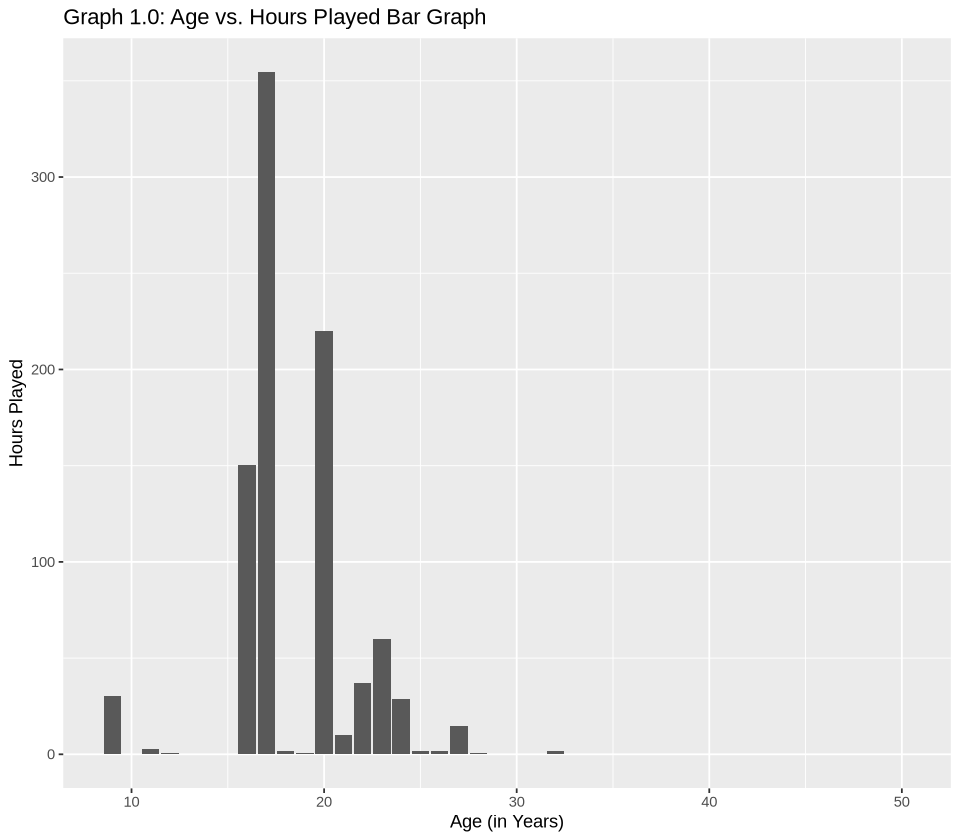

In [28]:
set.seed(123)
#visualizing the data, we can see the age range of 16-22 has a very high play time, we can explore this further in our project
options(repr.plot.width = 8, repr.plot.height = 7)
age_plot <- players_training|>
    ggplot(aes(x = Age, y = played_hours))+
            geom_bar(stat = "identity") +
    labs(x = "Age (in Years)", y = "Hours Played", title = "Graph 1.0: Age vs. Hours Played Bar Graph") +
    theme(element_text(size = 15))
age_plot

In [25]:
set.seed(123)
#since the high play times might be due to the fact that there are more observations with that age range, 
#we can find the mean play time of everyone by grouping by age and summarizing to find the mean played hours
players_grouped <- players_training|>
    group_by(Age)|>
    summarize(mean_played_time = mean(played_hours))
players_grouped

Age,mean_played_time
<int>,<dbl>
9,30.3000000
11,2.9000000
12,0.5000000
15,0.1000000
16,50.0333333
17,5.3696970
18,0.2285714
19,0.1600000
20,20.0090909


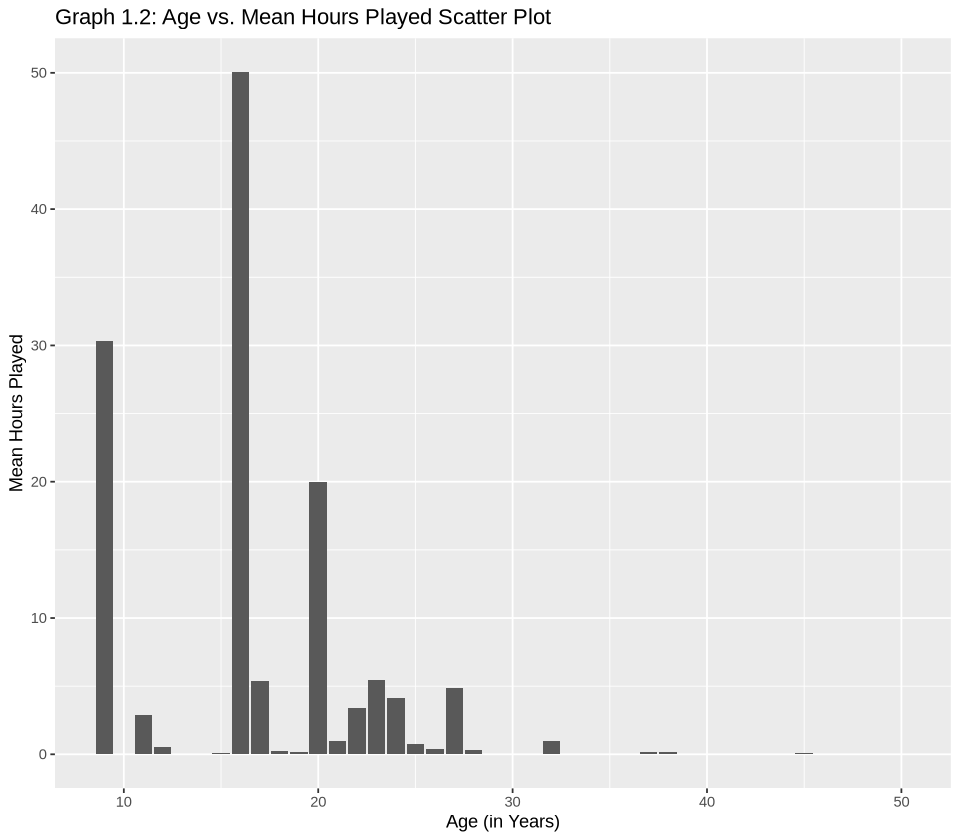

In [27]:
set.seed(123)
#now, we can see a smaller range of players between 19-20 that seem to have the highest play time
players_grouped_graph <- players_grouped|>
    ggplot(aes(x = Age, y = mean_played_time))+
    geom_bar(stat = "identity")+
    labs(x = "Age (in Years)", y = "Mean Hours Played", title = "Graph 1.2: Age vs. Mean Hours Played Scatter Plot")
players_grouped_graph

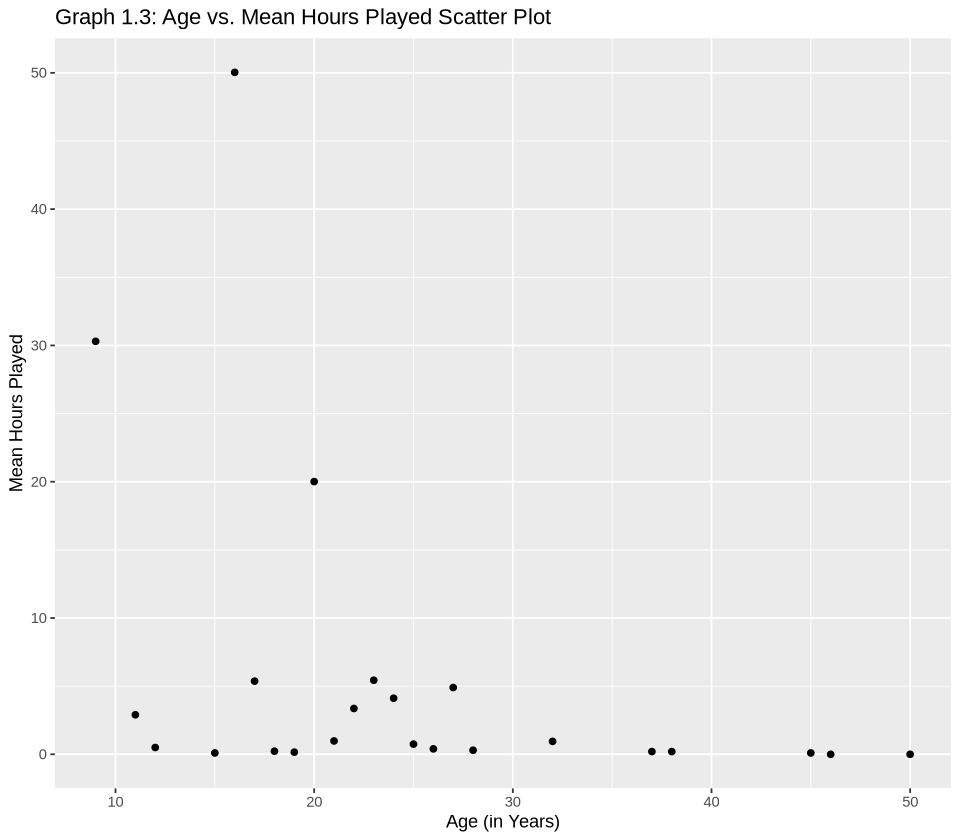

In [15]:
set.seed(123)
#to decide which regression model to use, we should see if the data is linear
#since the visualization below shows that the data is not linear, then we should not use linear regression and should use KNN regression
players_grouped_scatter <- players_grouped|>
    ggplot(aes(x = Age, y = mean_played_time))+
    geom_point()+
    labs(x = "Age (in Years)", y = "Mean Hours Played", title = "Graph 1.3: Age vs. Mean Hours Played Scatter Plot")
players_grouped_scatter

In [10]:
set.seed(123)
#making the recipe for the regression model and standardizing the data:
age_recipe <- recipe(played_hours ~ Age, data = players_training)|>
    step_center(Age)|>
    step_scale(Age)
age_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 1



── Operations 

• Centering for: Age

• Scaling for: Age



In [11]:
set.seed(123)
#making the model for KNN regression, we want to optimize for the best K
#so, instead of specifying the K, we will use tune() to use cross validation with 5 folds
age_model <- nearest_neighbor(weight_func = 'rectangular', neighbors = tune())|>
    set_engine('kknn')|>
    set_mode('regression')
age_model

K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [12]:
set.seed(123)
#we will test a range of neighbours from 1 to 15 to find the best K
age_vfold <- vfold_cv(players_training, v = 5, strata = played_hours)
age_grid <- tibble(neighbors = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15))

age_w <- workflow()|>
    add_recipe(age_recipe)|>
    add_model(age_model)
age_w

age_workflow <- age_w |>
    tune_grid(resamples = age_vfold, grid = age_grid) |>
    collect_metrics()
age_workflow

#using our workflow, we will find the best K with the lowest root mean squared error
age_trained <- age_workflow|>
    filter(.metric == "rmse")|>
    filter(mean == min(mean))
age_trained
#thus, we have found that 4 neighbours is the best K

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_center()
• step_scale()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,29.609332076,5,5.556544547,Preprocessor1_Model01
1,rsq,standard,0.037778595,5,0.035730047,Preprocessor1_Model01
2,rmse,standard,27.746341578,5,6.373758750,Preprocessor1_Model02
2,rsq,standard,0.034542436,5,0.030853250,Preprocessor1_Model02
3,rmse,standard,26.825840077,5,6.519996001,Preprocessor1_Model03
3,rsq,standard,0.010870930,5,0.007135817,Preprocessor1_Model03
4,rmse,standard,26.452234478,5,6.612244952,Preprocessor1_Model04
4,rsq,standard,0.005234409,5,0.001158406,Preprocessor1_Model04
5,rmse,standard,26.509158856,5,6.529029975,Preprocessor1_Model05


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
4,rmse,standard,26.45223,5,6.612245,Preprocessor1_Model04


In [13]:
#next, we will fix our model to use the best K = 4 in our regression
age_spec <- nearest_neighbor(weight_func = 'rectangular', neighbors = 4)|>
    set_engine('kknn')|>
    set_mode('regression')

age_fit <- workflow()|>
    add_recipe(age_recipe)|>
    add_model(age_spec)|>
    fit(data = players_training)
age_fit

#now we will see the root mean squared prediction error
age_rmspe <- age_fit |>
        predict(players_testing) |>
        bind_cols(players_testing) |>
        metrics(truth = played_hours, estimate = .pred)|>
        filter(.metric == "rmse")
age_rmspe
#we can see that the root mean squared prediction error from our testing data is not significantly different 
#from the RMSE of our training model of best K

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_center()
• step_scale()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(4,     data, 5), kernel = ~"rectangular")

Type of response variable: continuous
minimal mean absolute error: 6.983766
Minimal mean squared error: 823.4324
Best kernel: rectangular
Best k: 4

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,28.54026


.pred,Age,played_hours
<dbl>,<int>,<dbl>
0.025,17,0.0
0.050,19,0.0
0.025,21,0.0
0.025,17,0.1
0.025,22,0.0
0.025,17,0.0


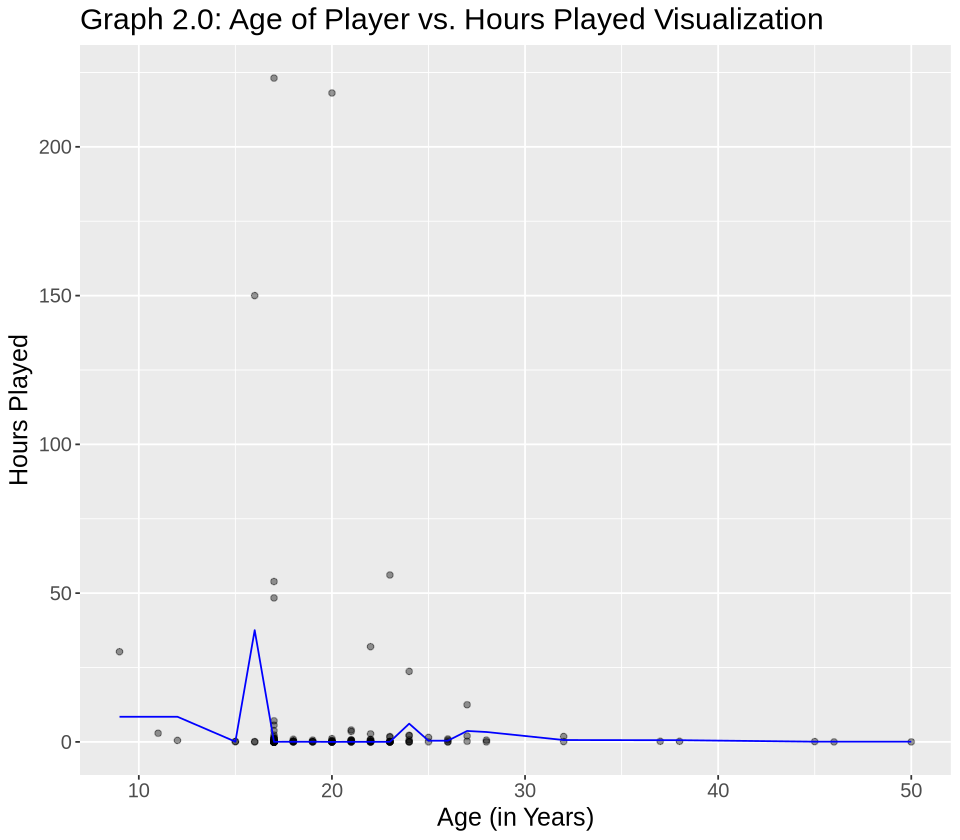

In [16]:
set.seed(123)
#now, we will make a visualization of our analysis
age_pred <- age_fit |>
          predict(players_training) |>
          bind_cols(players_training)
head(age_pred)
age_plot <- age_pred|>
    ggplot(aes(x = Age, y = played_hours)) +
    geom_point(alpha = 0.4) +
    geom_line(data = age_pred, mapping = aes(x = Age, y = .pred), colour = "blue") +
    labs(x = "Age (in Years)", y = "Hours Played", title = "Graph 2.0: Age of Player vs. Hours Played Visualization")+
    theme(text = element_text(size = 15))
age_plot


## Discussion ##

The relationship between age and hours played on the server shows a concentration of playtime among younger individuals, particularly ages between 16 and 22. Beyond this there is a steep decline in hours played, where youth under 16 have relatively low playtimes, and individuals over 30 have little to no playtime.

Several factors may contribute to this trend. Firstly, Minecraft holds significance for the large group of players between 16-22, as many likely grew up with the game. Minecraft had its official release in 2011, and has exploded in popularity over the last decade. Its accessibility and popularity has allowed for most young adults to have experiences with the game, and thus develop a familiarity over the years. As a result, returning players may feel a sense of nostalgia, and current players are simply continuing to play a game they enjoy. Additionally, young adults often have more flexible schedules compared to working adults. Many students also experience social environments where gaming is a common activity, which further reinforces engagement. Additionally, since the server was set up and maintained by computer science students at UBC, it’s likely that the study mainly reaches their peers.

There is a relatively small amount of playtime for children under the age of 10, even though Minecraft is popular for younger audiences. This may be due to how the servers are accessed. Firstly, an email address is required to get an access key, and younger children may not feel comfortable entering their email or may not have an email at all. In addition, many children do not have access to the internet without parental permission and supervision, which acts as another barrier between server access and the player. Lastly, young children may not have the same long-term engagement with Minecraft, and may not be able to contribute as many consecutive hours as older players.

After early twenties, there is a noticeable decline in the number of hours played. This likely relates to adults joining the workforce after college, and having less time to contribute to the database. Minecraft may also not present as much of an interest to older individuals, as they have not grown up with it unlike their younger counterparts. This also creates a reduced social incentive as it is less likely for their peers to play the same game.

Overall, the data demonstrates a significant correlation between age and playtime, with the 16-22 age group contributing mostly to the overall activity. Based on this information, targeting this demographic is crucial for maximizing engagement. This could include advertising on university and high-school campuses, incorporating competitive aspects, and creating social spaces specifically for interaction with the database. These approaches would greatly leverage the interests and behaviors of this key age group, which would increase participation and overall engagement.

